<a href="https://colab.research.google.com/github/seeedata/OUTTA-AI-BOOTCAMP/blob/main/0715%20Regression_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Load

In [ ]:
#gapminder dataset 라이브러리를 설치합니다.
!pip install gapminder

In [ ]:
#gapminder를 import하고 출력합니다.
from gapminder import gapminder
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


# Regression

**주어진 데이터를 활용하여 대륙명, 연도, 기대수명, 인구가 주어졌을 때 1인당 GDP를 예측하는 모델을 만드려고 한다.**

1. 주어진 빈칸에 알맞은 값을 입력하여 country 열을 뺀 새로운 데이터를 gapminder 변수에 할당 하시오.
아래와 같이 gapminder 데이터가 출력될 수 있게 하시오. (10점)

In [ ]:
gapminder = gapminder.iloc[:, 1:]

In [ ]:
gapminder

,continent,year,lifeExp,pop,gdpPercap
0,Asia,1952,28.801,8425333,779.445314
1,Asia,1957,30.332,9240934,820.853030
2,Asia,1962,31.997,10267083,853.100710
3,Asia,1967,34.020,11537966,836.197138
4,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...
1699,Africa,1987,62.351,9216418,706.157306
1700,Africa,1992,60.377,10704340,693.420786
1701,Africa,1997,46.809,11404948,792.449960
1702,Africa,2002,39.989,11926563,672.038623


2. 주어진 빈칸에 알맞은 값을 입력하여 continent 열을 one-hot encoding한 데이터를 encoded_data 변수에 할당하시오. 아래와 같이 encoded_data가 출력될 수 있게 하시오. (10점)

In [ ]:
import pandas as pd

encoded_data = pd.get_dummies(gapminder, columns=['continent'])

In [ ]:
encoded_data

,year,lifeExp,pop,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
0,1952,28.801,8425333,779.445314,0,0,1,0,0
1,1957,30.332,9240934,820.853030,0,0,1,0,0
2,1962,31.997,10267083,853.100710,0,0,1,0,0
3,1967,34.020,11537966,836.197138,0,0,1,0,0
4,1972,36.088,13079460,739.981106,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1699,1987,62.351,9216418,706.157306,1,0,0,0,0
1700,1992,60.377,10704340,693.420786,1,0,0,0,0
1701,1997,46.809,11404948,792.449960,1,0,0,0,0
1702,2002,39.989,11926563,672.038623,1,0,0,0,0


3. 알맞은 코드를 입력하여 아래와 같이 2x2 subplot에 year, lifeExp, pop, gdpPercap에 대한 히스토그램을 그려서 출력하시오. (20점)

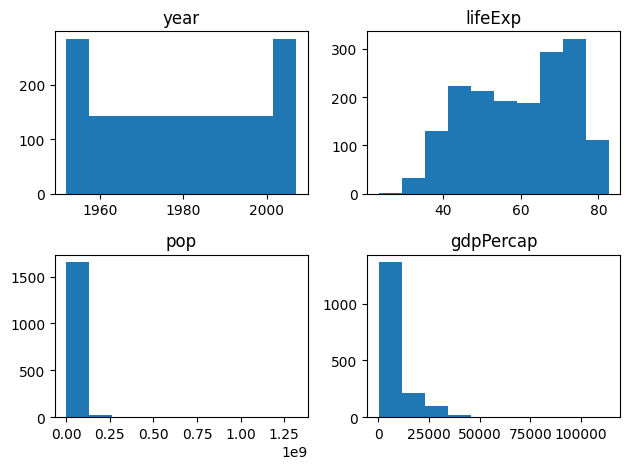

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(2,2,1)
plt.hist(encoded_data['year'])
plt.title('year')

plt.subplot(2,2,2)
plt.hist(encoded_data['lifeExp'])
plt.title('lifeExp')

plt.subplot(2,2,3)
plt.hist(encoded_data['pop'])
plt.title('pop')

plt.subplot(2,2,4)
plt.hist(encoded_data['gdpPercap'])
plt.title('gdpPercap')

plt.tight_layout()
plt.show()

4. pop과 gdpPercap 변수를 로그 변환을 하려 한다. 주어진 빈칸을 채워 넣어 알맞게 로그 변환 하시오. (10점)

In [ ]:
import numpy as np

encoded_data['pop_log'] = np.log(encoded_data['pop'])
encoded_data['gdpPercap_log'] = np.log(encoded_data['gdpPercap'])

5. 주어진 빈칸을 알맞게 채워 넣어 pop_log, year, lifeExp, 원핫 인코딩된 대륙명 변수를 활용하여 gdpPercap_log를 예측하는 선형 회귀 모델을 만들고 MSE로 평가 하시오.이때, 다중 공선성 오류를 피하기 위해 원핫 인코딩된 변수는 continent_Oceania 변수를 제외하고 입력하시오. (20점)

In [ ]:
encoded_data.columns

Index(['year', 'lifeExp', 'pop', 'gdpPercap', 'continent_Africa',
       'continent_Americas', 'continent_Asia', 'continent_Europe',
       'continent_Oceania', 'pop_log', 'gdpPercap_log'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터 추출
X_df = encoded_data[['pop_log','year','lifeExp','continent_Africa','continent_Americas', 'continent_Asia', 'continent_Europe']]
y_df = encoded_data[['gdpPercap_log']]

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# 모델 로드
lin_reg = LinearRegression()

# 모델 학습
lin_reg.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"{lin_reg.__class__.__name__} MSE: {mse}") #mse를 출력하는 코드

LinearRegression MSE: 0.4168393847396488


6. 주어진 빈칸을 알맞게 채워 넣어 pop_log, year, lifeExp, 원핫 인코딩된 대륙명 변수를 활용하여 gdpPercap_log를 예측하는 GradientBoosting, XGBoost, LightGBM 회귀 모델을 만들고 MSE로 평가 하시오.이때, 다중 공선성 오류를 피하기 위해 원핫 인코딩된 변수는 continent_Oceania 변수를 제외하고 입력하시오. (30점)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 모델 정의
gb_reg = GradientBoostingRegressor()
xgb_reg = XGBRegressor()
lgb_reg = LGBMRegressor()

# 모델 학습
gb_reg.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train)
lgb_reg.fit(X_train, y_train)

# 예측 및 성능 평가
for model in [gb_reg, xgb_reg, lgb_reg]:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__} MSE: {mse}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor MSE: 0.34065951339298345
XGBRegressor MSE: 0.37222287198419934
LGBMRegressor MSE: 0.33232827916593727


# 보너스

1. 데이터 전처리 시간에 배운 것을 활용하여 데이터를 전처리하고, 전처리한 데이터를 가지고 LGBMRegressor()로 학습하시오. (시도 시 10점, 기존 모델에 비해 성능 향상 시 10점)

In [ ]:
encoded_data.describe()

,year,lifeExp,pop,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,pop_log,gdpPercap_log
count,1704.00000,1704.000000,1.704000e+03,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081,0.366197,0.176056,0.232394,0.211268,0.014085,15.766110,8.158791
std,17.26533,12.917107,1.061579e+08,9857.454543,0.481906,0.380980,0.422483,0.408328,0.117874,1.604654,1.241164
min,1952.00000,23.599000,6.001100e+04,241.165876,0.000000,0.000000,0.000000,0.000000,0.000000,11.002283,5.485485
25%,1965.75000,48.198000,2.793664e+06,1202.060309,0.000000,0.000000,0.000000,0.000000,0.000000,14.842864,7.091792
50%,1979.50000,60.712500,7.023596e+06,3531.846988,0.000000,0.000000,0.000000,0.000000,0.000000,15.764786,8.169576
75%,1993.25000,70.845500,1.958522e+07,9325.462346,1.000000,0.000000,0.000000,0.000000,0.000000,16.790286,9.140504
max,2007.00000,82.603000,1.318683e+09,113523.132900,1.000000,1.000000,1.000000,1.000000,1.000000,20.999899,11.639762


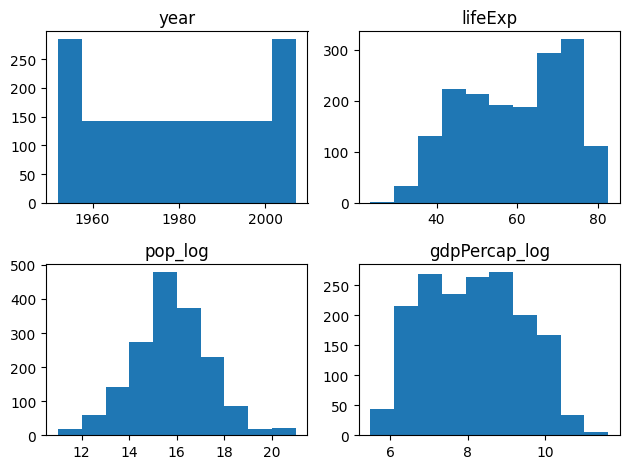

In [ ]:
plt.subplot(2,2,1)
plt.hist(encoded_data['year'])
plt.title('year')

plt.subplot(2,2,2)
plt.hist(encoded_data['lifeExp'])
plt.title('lifeExp')

plt.subplot(2,2,3)
plt.hist(encoded_data['pop_log'])
plt.title('pop_log')

plt.subplot(2,2,4)
plt.hist(encoded_data['gdpPercap_log'])
plt.title('gdpPercap_log')

plt.tight_layout()
plt.show()

### minmaxscaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
encoded_data_mm = scaler.fit_transform(encoded_data[['year','lifeExp','pop_log','gdpPercap_log','continent_Africa','continent_Americas','continent_Asia','continent_Europe','continent_Oceania']])

In [ ]:
columns = ['year','lifeExp','pop_log','gdpPercap_log','continent_Africa','continent_Americas','continent_Asia','continent_Europe','continent_Oceania']
encoded_data_mm = pd.DataFrame(encoded_data_mm, columns = columns)
encoded_data_mm

,year,lifeExp,pop_log,gdpPercap_log,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
0,0.000000,0.088164,0.494565,0.190615,0.0,0.0,1.0,0.0,0.0
1,0.090909,0.114111,0.503807,0.199026,0.0,0.0,1.0,0.0,0.0
2,0.181818,0.142329,0.514340,0.205287,0.0,0.0,1.0,0.0,0.0
3,0.272727,0.176615,0.526012,0.202035,0.0,0.0,1.0,0.0,0.0
4,0.363636,0.211664,0.538555,0.182172,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1699,0.636364,0.656769,0.503541,0.174570,1.0,0.0,0.0,0.0,0.0
1700,0.727273,0.623314,0.518511,0.171613,1.0,0.0,0.0,0.0,0.0
1701,0.818182,0.393363,0.524853,0.193304,1.0,0.0,0.0,0.0,0.0
1702,0.909091,0.277778,0.529326,0.166523,1.0,0.0,0.0,0.0,0.0


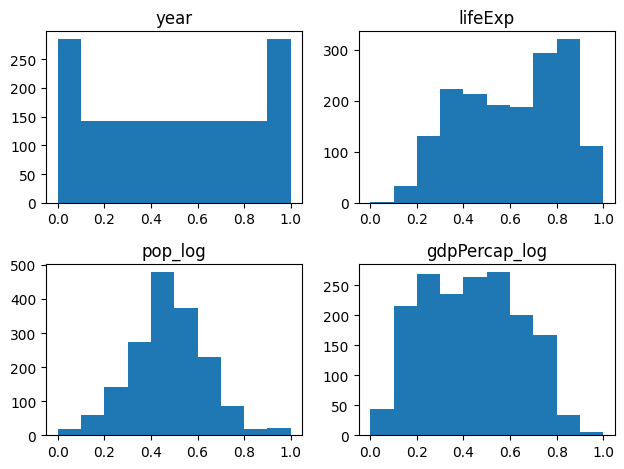

In [ ]:
plt.subplot(2,2,1)
plt.hist(encoded_data_mm['year'])
plt.title('year')

plt.subplot(2,2,2)
plt.hist(encoded_data_mm['lifeExp'])
plt.title('lifeExp')

plt.subplot(2,2,3)
plt.hist(encoded_data_mm['pop_log'])
plt.title('pop_log')

plt.subplot(2,2,4)
plt.hist(encoded_data_mm['gdpPercap_log'])
plt.title('gdpPercap_log')

plt.tight_layout()
plt.show()

In [ ]:
# 데이터 추출
X_df = encoded_data_mm[['pop_log','year','lifeExp','continent_Africa','continent_Americas', 'continent_Asia', 'continent_Europe']]
y_df = encoded_data_mm[['gdpPercap_log']]

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

In [ ]:
lgb_reg = LGBMRegressor()

lgb_reg.fit(X_train, y_train)

y_pred = lgb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"{lgb_reg.__class__.__name__} MSE: {mse}")

LGBMRegressor MSE: 0.008816564733579434


2. 선형 회귀 모델을 이용하여 회귀분석을 진행하고, 그 의미에 대해서 직접 해석해보시오. (시도 시 10점)

In [ ]:
import statsmodels.api as sm

X_train_with_intercept = sm.add_constant(X_train)
X_test_with_intercept = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_with_intercept)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          gdpPercap_log   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     419.6
Date:                Wed, 02 Aug 2023   Prob (F-statistic):               0.00
Time:                        10:36:27   Log-Likelihood:                 1027.5
No. Observations:                1363   AIC:                            -2039.
Df Residuals:                    1355   BIC:                            -1997.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2023      0

### 해석을 적는 란

해석:
1. R^2이 0.684이므로 이 선형 회귀 모델은 데이터를 68.4% 설명한다.
2. 나머지 변수를 고정했을 때, 인구가 많을수록 1인당 gdp는 감소한다.
3. 나머지 변수를 고정했을 때, 연도가 최근일수록 1인당 gdp는 감소한다.
4. 나머지 변수를 고정했을 때, 기대수명이 높을수록 1인당 gdp는 증가한다.
5. 나머지 변수를 고정했을 때, Africa 대륙일 경우 1인당 gdp는 감소한다.
6. 나머지 변수를 고정했을 때, Americas 대륙일 경우 1인당 gdp는 감소한다.
7. 나머지 변수를 고정했을 때, Asia 대륙일 경우 1인당 gdp는 감소한다.
8. continent_Europe 변수는 pvalue가 0.05보다 크므로, 유의수준 5% 하에서 유의하지 않다.